### Import the required libraries and load the data

#### 1. Load the required libraries and read the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'renttherunway.csv')
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


#### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [4]:
df.shape

(192544, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

### Data cleansing and Exploratory data analysis:

#### 3. Check if there are any duplicate records in the dataset? If any, drop them.

In [6]:
df[df.duplicated()]

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date


In [ ]:
# As per above, there are no duplicates

#### 4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’)

In [7]:
## dropping the unnamed  and user_id and item_id
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df.drop(df.filter(regex="_id"),axis=1,inplace=True)

In [8]:
## dropping the columns related to review
df.drop(df.filter(regex="review_"),axis=1, inplace=True)

In [9]:
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


#### 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs)

In [10]:
df['weight'] = df['weight'].str.replace('lbs','')

In [11]:
df['weight'] = df['weight'].fillna(0)

In [12]:
df['weight'] = df['weight'].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   bust size   174133 non-null  object 
 2   weight      192544 non-null  float64
 3   rating      192462 non-null  float64
 4   rented for  192534 non-null  object 
 5   body type   177907 non-null  object 
 6   category    192544 non-null  object 
 7   height      191867 non-null  object 
 8   size        192544 non-null  int64  
 9   age         191584 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 14.7+ MB


#### 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'.

In [14]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [15]:
df['rented for'] = df['rented for'].replace('party: cocktail','party')

In [16]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

#### 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype.

In [17]:
## removing " and space
df['height'] = df['height'].str.replace('"','')
df['height'] = df['height'].str.replace("' ","'")

In [18]:
df['height'] = df['height'].fillna("0'0")
df.height = [s.split('\'') for s in df.height]
## Coverting height to inches
df.height = [float(value[0])*12 + float(value[1]) for value in df.height]

In [19]:
df.height

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

#### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [20]:
df.fillna(df.dtypes.replace({'float64': 0.0, 'int64': 0, 'object': 'None'}), inplace=True)

#### 9. Check the  statistical summary for the numerical and categorical columns and write your findings.

In [21]:
df.info()
## statistical summary for the numerical columns
df[['weight','height','rating','age','size']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   bust size   192544 non-null  object 
 2   weight      192544 non-null  float64
 3   rating      192544 non-null  float64
 4   rented for  192544 non-null  object 
 5   body type   192544 non-null  object 
 6   category    192544 non-null  object 
 7   height      192544 non-null  float64
 8   size        192544 non-null  int64  
 9   age         192544 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 14.7+ MB


,weight,height,rating,age,size
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,115.997751,65.080984,9.088499,33.702141,12.245175
std,53.726993,4.691938,1.441995,8.384539,8.494877
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115.000000,63.000000,8.000000,29.000000,8.000000
50%,130.000000,65.000000,10.000000,32.000000,12.000000
75%,145.000000,67.000000,10.000000,37.000000,16.000000
max,300.000000,78.000000,10.000000,117.000000,58.000000


In [22]:
## statistical summary  for categorical columns
df[['fit','bust size','rented for','body type','category']].describe()

,fit,bust size,rented for,body type,category
count,192544,192544,192544,192544,192544
unique,3,107,9,8,68
top,fit,34b,wedding,hourglass,dress
freq,142058,27285,57784,55349,92884


#### 10. Are there outliers present in the column age? If yes, treat them with the appropriate method.

/Users/tarangini.shetty/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

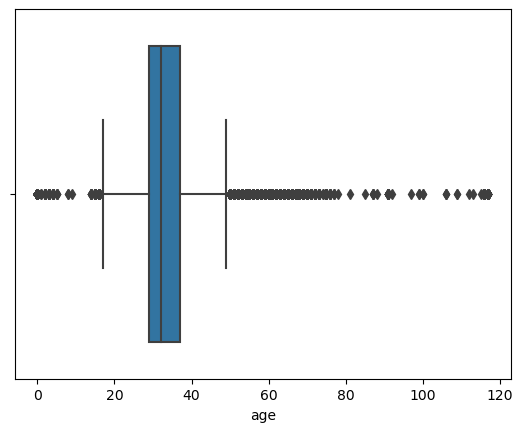

In [23]:
sns.boxplot(df['age'])

In [ ]:
##Based on the above plot, there are outliers, lower and higher than fences
##We can use iQR technique to remove them

In [24]:
q1 = df['age'].quantile(0.25)
q2 = df['age'].quantile(0.50)
q3 = df['age'].quantile(0.75)

In [25]:
iqr = q3-q1
iqr

8.0

In [26]:
upper_limit = q3 + 1.5*iqr
upper_limit

49.0

In [27]:
lower_limit = q1 - 1.5*iqr
lower_limit

17.0

In [28]:
df_wo_out = df.loc [(df['age'] > lower_limit) & (df['age'] < upper_limit)]

/Users/tarangini.shetty/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

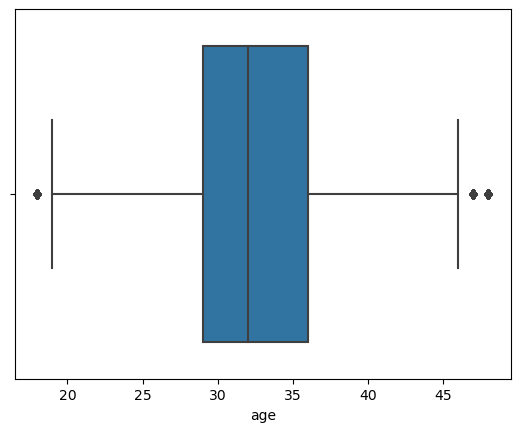

In [29]:
sns.boxplot(df_wo_out['age'])

In [30]:
### Removed the outliers, thus the shape has changed
df = df_wo_out
df.shape

(179748, 10)

#### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.

<AxesSubplot:>

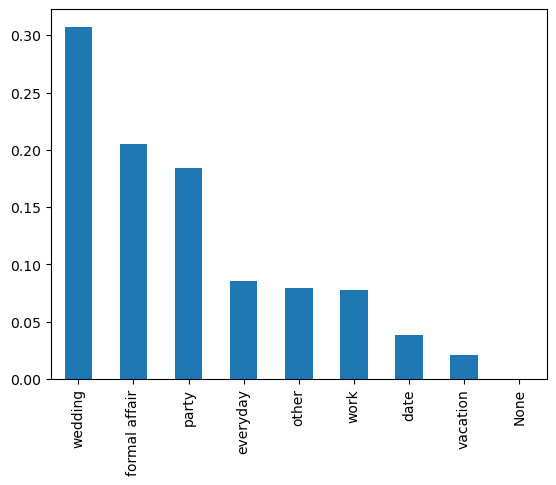

In [31]:
df['rented for'].value_counts(normalize=True).plot(kind='bar')

### Data Preparation for model building:

#### 12. Encode the categorical variables in the dataset.

In [35]:
from sklearn.preprocessing import LabelEncoder
cate = ['fit','bust size','rented for','body type','category']

In [36]:
lbl_encode = LabelEncoder()
for i in cate:
    df[i] = df[[i]].apply(lbl_encode.fit_transform)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179748 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         179748 non-null  int64  
 1   bust size   179748 non-null  int64  
 2   weight      179748 non-null  float64
 3   rating      179748 non-null  float64
 4   rented for  179748 non-null  int64  
 5   body type   179748 non-null  int64  
 6   category    179748 non-null  int64  
 7   height      179748 non-null  float64
 8   size        179748 non-null  int64  
 9   age         179748 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 15.1 MB


#### 13. Standardize the data, so that the values are within a particular range.

In [37]:
from sklearn.preprocessing import StandardScaler

#Standardization
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)


In [38]:
scaled_features_df

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,-0.556711,-0.281255,0.394226,0.633940,0.502800,0.170621,1.578761,0.620080,0.234497,-0.768582
1,-0.556711,-0.371342,0.301065,0.633940,-0.467955,1.761874,-0.304735,0.194884,-0.003915,0.583413
3,-0.556711,-0.326299,0.356962,-0.757027,-0.953333,0.701039,-0.618651,-0.017714,-0.480740,0.245414
4,-0.556711,-0.371342,0.543284,0.633940,0.988178,-0.890215,-0.304735,0.832677,-0.003915,-0.937582
5,-0.556711,-0.956907,0.412859,-0.757027,-1.924089,-0.890215,-0.618651,0.620080,-0.480740,2.104408
...,...,...,...,...,...,...,...,...,...,...
192539,-0.556711,-0.191168,0.450123,0.633940,1.473556,0.170621,0.166139,0.832677,-0.480740,1.597410
192540,-0.556711,-0.911863,-0.295165,0.633940,1.473556,1.231456,-0.618651,-0.868106,-0.957565,-0.599583
192541,-0.556711,0.124136,0.356962,-2.147995,-1.438711,1.761874,-0.618651,0.620080,-0.480740,-0.261584
192542,-0.556711,0.259266,0.915928,0.633940,0.988178,0.701039,-0.618651,0.194884,0.472909,-0.261584


### Principal Component Analysis and Clustering:

#### 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [39]:
##Step 1
cov_matrix = np.cov(scaled_features_df.T)
cov_matrix

array([[ 1.00000556e+00,  2.25997871e-03,  1.11519325e-02,
        -2.41831542e-01,  7.54016130e-03, -6.92169364e-03,
         7.49130837e-04, -2.01113543e-03,  6.53322866e-02,
        -1.87628818e-03],
       [ 2.25997871e-03,  1.00000556e+00, -1.38690532e-01,
        -1.95240225e-03,  4.18414143e-03, -2.42977109e-01,
        -8.70243784e-03,  3.54164616e-02,  3.62380748e-01,
         6.07536719e-02],
       [ 1.11519325e-02, -1.38690532e-01,  1.00000556e+00,
        -8.75579806e-03, -6.83988475e-04,  4.19082046e-02,
         2.12247400e-03,  7.89608341e-02,  8.01061144e-02,
         5.65642625e-02],
       [-2.41831542e-01, -1.95240225e-03, -8.75579806e-03,
         1.00000556e+00,  1.32382024e-02, -9.79255480e-03,
        -2.27853326e-02,  4.17849920e-03, -3.72017436e-02,
        -5.06620729e-02],
       [ 7.54016130e-03,  4.18414143e-03, -6.83988475e-04,
         1.32382024e-02,  1.00000556e+00, -2.05585266e-02,
        -5.85881651e-02, -1.29596580e-02,  6.67676674e-03,
        -1.

In [40]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigein vals:','\n',eig_vals)
print('\n')
print('eigein vectors','\n',eig_vectors)

eigein vals: 
 [1.59729979 0.56979779 1.25685354 1.1449666  0.74890362 1.06474548
 0.80830507 0.87360625 0.9920029  0.9435746 ]


eigein vectors 
 [[-1.06836943e-01 -9.85009863e-02  6.35211785e-01  2.53808691e-01
  -6.74134800e-01  1.35752987e-01  8.99949840e-02  8.73649076e-02
  -1.49506636e-01  8.58936151e-07]
 [-5.85609256e-01 -6.76285734e-01 -1.77436680e-01  2.11079218e-01
   1.22767047e-01 -7.40441285e-02  3.15213967e-01  5.49883211e-04
   3.77629358e-02 -4.81739143e-02]
 [ 3.88134043e-02 -3.02712287e-01  2.33168215e-01 -6.82448575e-01
   1.10021581e-01  1.83573766e-01  2.54326313e-02  5.70796101e-01
   2.32654660e-02  1.18131079e-01]
 [ 8.95476270e-02 -1.68718987e-02 -6.61560216e-01 -2.16112594e-01
  -6.81355049e-01  1.23582932e-03  1.70835499e-01  1.13760373e-01
   1.21649983e-02  2.84531376e-02]
 [-1.59125020e-02 -1.12773434e-02 -6.65057012e-02  1.17966385e-01
   3.45541000e-02  6.53099489e-01  3.75005421e-02 -2.02708002e-01
   2.77837212e-01  6.58678425e-01]
 [ 4.48385420e-01 

In [41]:
## Step3: Scree plot.
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained: ', cum_var_exp)

Explained Variance:  [15.972909010148994, 12.568465484628202, 11.449602343728616, 10.647395602078765, 9.919973777661385, 9.435693498570053, 8.736013909354833, 8.08300568793914, 7.4889945216081415, 5.697946164281873]
Cummulative Variance Explained:  [ 15.97290901  28.54137449  39.99097684  50.63837244  60.55834622
  69.99403972  78.73005363  86.81305931  94.30205384 100.        ]


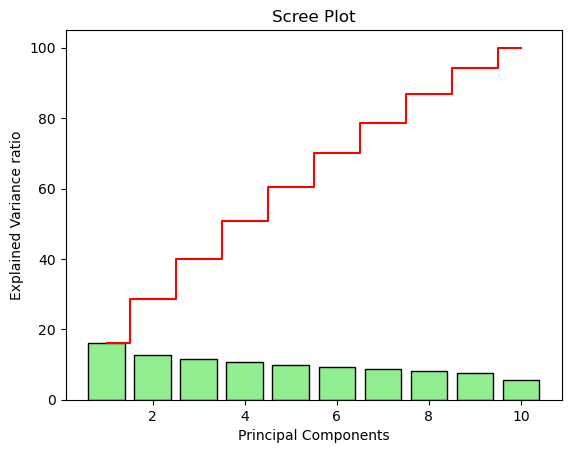

In [42]:
## Scree plot.
plt.bar(range(1,len(var_exp)+1),var_exp, align='center', color='lightgreen', edgecolor='black', label='Explained Variance')
plt.step(range(1,len(var_exp)+1),cum_var_exp, where='mid', color='red',label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance ratio')
plt.title('Scree Plot')
#plt.legend(loc='best')
plt.show()


#### 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data)

##### a. Find the optimal K Value using elbow plot for K Means clustering.

##### b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.

##### c. Compute silhouette score for evaluating the quality of the K Means clustering technique.

#### 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data) 

##### a. Find the optimal K Value using dendrogram for Agglomerative clustering.

##### b. Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram.

##### c. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique. 

#### 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results